# Regressão Linear, p-value e métricas.


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import *

## A) Correlação


### Plotes

In [46]:
def notation_format(valor):
    s = str(valor).lower()

    if 'e' not in s:
        s = "{:e}".format(float(valor))
        
    base, expoente = s.split('e')
    expoente_limpo = str(int(expoente))
    tabela = str.maketrans("0123456789-", "⁰¹²³⁴⁵⁶⁷⁸⁹⁻")
    expoente_unicode = expoente_limpo.translate(tabela)
    
    return f"{base} × 10{expoente_unicode}"

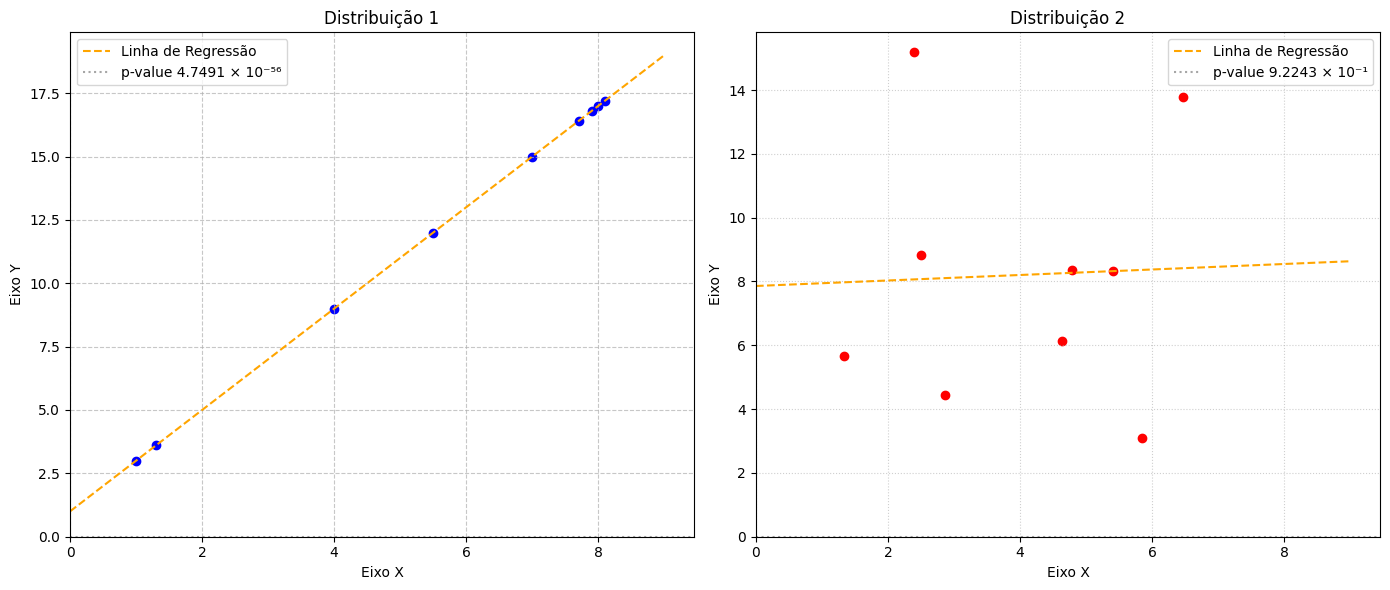

In [47]:

numero_de_pontos = 9


abscissas_linear = np.array([1,1.3,4,5.5,7,7.7,7.9,8,8.1])
array_nulo = np.array([0 for i in range(numero_de_pontos)])
ordenadas_linear = 2 * abscissas_linear + 1

np.random.seed(102)
abscissas_aleatorias = np.random.uniform(0, 8, numero_de_pontos)
ordenadas_aleatorias = np.random.uniform(0, 17, numero_de_pontos)


figura, eixos = plt.subplots(1, 2, figsize=(14, 6))

lin_reg_linear = linregress(abscissas_linear, ordenadas_linear)
lin_reg_aleatoria = linregress(abscissas_aleatorias, ordenadas_aleatorias)


x_fit = np.array([0, 9])
y_fit_linear = lin_reg_linear.slope * x_fit + lin_reg_linear.intercept
eixos[0].plot(x_fit, y_fit_linear, color='orange', linestyle='--', label='Linha de Regressão')

eixos[0].scatter(
    abscissas_linear,
    ordenadas_linear, 
    #marker='o', 
    #linestyle='-', 
    color='b', 
    )

eixos[0].set_title('Distribuição 1')
eixos[0].set_xlabel('Eixo X')
eixos[0].set_ylabel('Eixo Y')
eixos[0].set_xlim(left=0)
eixos[0].set_ylim(bottom=0)
eixos[0].grid(True, linestyle='--', alpha=0.7)
eixos[0].axhline(label=f"p-value {notation_format(f"{lin_reg_linear.pvalue:.4e}")}", color='gray', linestyle=':', alpha=0.7)
eixos[0].legend()


x_fit_aleatorio = np.array([0, 9])
y_fit_aleatorio = lin_reg_aleatoria.slope * x_fit_aleatorio + lin_reg_aleatoria.intercept
eixos[1].plot(x_fit_aleatorio, y_fit_aleatorio, color='orange', linestyle='--', label='Linha de Regressão')


eixos[1].scatter(abscissas_aleatorias, ordenadas_aleatorias, color='r')
eixos[1].set_title('Distribuição 2')
eixos[1].set_xlabel('Eixo X')
eixos[1].set_ylabel('Eixo Y')
eixos[1].set_xlim(left=0)
eixos[1].set_ylim(bottom=0)
eixos[1].grid(True, linestyle=':', alpha=0.6)
eixos[1].axhline(label=f"p-value {notation_format(f"{lin_reg_aleatoria.pvalue:.4e}")}", color='gray', linestyle=':', alpha=0.7)
eixos[1].legend()


plt.tight_layout()

In [48]:
resultados = pd.DataFrame({
    'Distribuição': ['Linear', 'Aleatória'],
    'Slope': [lin_reg_linear.slope, lin_reg_aleatoria.slope],
    'Intercept': [lin_reg_linear.intercept, lin_reg_aleatoria.intercept],
    'P-value': [lin_reg_linear.pvalue, lin_reg_aleatoria.pvalue],
    'R-value': [lin_reg_linear.rvalue, lin_reg_aleatoria.rvalue],
    'Std Err': [lin_reg_linear.stderr, lin_reg_aleatoria.stderr]
})

resultados = resultados.set_index('Distribuição').T

display(resultados)

Distribuição,Linear,Aleatória
Slope,2.000000e+00,0.086162
Intercept,1.000000e+00,7.859496
P-value,4.749083e-56,0.922431
R-value,1.000000e+00,0.038123
Std Err,1.126422e-08,0.853626


### Interpretação dos resultados


Na análise das duas distribuições formulamos uma hipótese nula $H_0$ ($X$ não exerce efeito sobre $Y$). Define-se um nível de significância de $5\%$ (definido por convenção), e calculamos o valor de _p-value_.
Caso o _p-value_ calculado esteja abaixo do nível estabelecido, podemos rejeitar $H_0$, e concluir que há evidência de associação entre as duas variáveis.

Calcula-se também o _r-value_, que corresponde ao coeficiente de correlação linear de Pearson entre $X$ e $Y$.
Esse coeficiente mede a força e a direção da associação linear entre as duas variáveis, assumindo valores no intervalo $[-1,1]$.
Valores próximos de $1$ indicam forte associação linear crescente; valores próximos de $−1$, forte associação linear decrescente; e valores próximos de $0$ indicam ausência de associação linear.

#### Cálculo de p-value
Ajusta-se a regressão linear $Y = \beta _0 + \beta _1 + \epsilon$, em que $\beta _0$ é o intercept e $\beta _0$ é o slope. Pelo método dos mínimos quadrados, obtém-se a estimativa $\hat{\beta _1}$.

Calcula-se então o erro padrão dessa estimativa, $SE(\hat{\beta _1})$, que mede sua variabilidade devido ao ruído dos dados.

Com esses valores, constrói-se a estatística de teste
$$
T = \frac{\hat{\beta _1}}{SE(\hat{\beta _1})}
$$
Sob a hipótese nula $H_0: \beta _1 = 0 $ essa estatística segue uma distribuição $t$ de Student
O p-value é a probabilidade, nessa distribuição, de observar um valor de tão extremo quanto o calculado.

#### Cálculo de r-value
O r-value é calculado diretamente a partir dos dados observados $(x_i,y_i)$, antes de qualquer teste de hipótese.
Ele corresponde ao coeficiente de correlação de Pearson entre $X$ e $Y$, dado por:
$$
r = \frac{\sum{(x_i-\bar{x})(y_i-\bar{y})}}{\sqrt{\sum{(x_i-\bar{x})}^2}\sqrt{\sum{(y_i-\bar{y})}^2}}
$$
Esse cálculo padroniza a covariância entre as variáveis pelas suas variâncias.
O resultado indica o quanto os pontos se alinham em torno de uma reta.
Na regressão linear simples, vale ainda que $R^2 = r^2$

#### Distribuição 1
Na Distribuição 1, os pontos seguem exatamente a regra $Y = 2X + 1$.
Não há ruído, não há dispersão, todos os pontos caem perfeitamente sobre a mesma reta.
Aqui, o r-value $=1$ (correlação linear perfeita) e o p-value será praticamente $0$ nesse caso ($4.74\cdot 10^{-56}$).
O modelo explica totalmente os dados e há evidência máxima de relação entre $X$ e $Y$, sendo descartada a hipótese nula ($H_0$).

#### Distribuição 2
No segundo conjunto, os pontos foram gerados aleatoriamente. 
Eles se espalham pelo plano sem qualquer padrão visível.
Nesse caso, o r-value $=0.038123$ (próximo de zero), indica ausência de relação linear, e o p-value altíssimo ($92,24\%$), indica que qualquer inclinação encontrada pela regressão pode ter surgido apenas por acaso. 

### Covariância

A biblioteca NumPy, já nos fornece um método implementado que calcula a covariância entre dois conjuntos de dados, e nos retorna na forma da matriz de covariância, dada por:
$$
C = 
\begin{bmatrix}
Cov(X,X) & Cov(X,Y)\\
Cov(Y,X) & Cov(Y,Y)\\
\end{bmatrix}
$$
onde:
$$
Cov(X,Y) = \frac{1}{n-1}\sum^n_{i=1}{(x_i-\overline{x})(y_i-\overline{y})}
$$

dessa forma aplicaremos essa função às nossas bases.

In [50]:
cov_linear = np.cov(m=abscissas_linear, y=ordenadas_linear)
cov_aleatoria = np.cov(m=abscissas_aleatorias, y=ordenadas_aleatorias)

print("Matriz de Covariância - Distribuição Linear:")
print(cov_linear)
print("\nMatriz de Covariância - Distribuição Aleatória:")
print(cov_aleatoria)

Matriz de Covariância - Distribuição Linear:
[[ 8.23611111 16.47222222]
 [16.47222222 32.94444444]]

Matriz de Covariância - Distribuição Aleatória:
[[ 3.21470652  0.276986  ]
 [ 0.276986   16.42126974]]


#### Covariância do caso linear
Os termos fora da diagonal $(16.472)$ são altos e positivos. Isso indica que $X$ e $Y$ variam juntos.
A covariância é grande porque sempre que $X$ aumenta, $Y$ aumenta proporcionalmente.
A matriz reflete uma dependência linear clara e forte entre as variáveis.

#### Covariância do caso aleatório
as variâncias aparecem na diagonal, mas o valor fora da diagonal é muito pequeno $(0.277)$.
Isso indica que não há variação conjunta consistente entre $X$ e $Y$.
Eles variam de forma praticamente independente.

## B) Estimando um Intervalo de Confiança para a Média

In [54]:
salary_data = pd.read_csv('data/Salary.csv')

# calcular a média x, e o desvio padrão s
mean_experience = salary_data['YearsExperience'].mean()
std_experience = salary_data['YearsExperience'].std()

print(f"Média de Anos de Experiência: {mean_experience:.2f}")
print(f"Desvio Padrão de Anos de Experiência: {std_experience:.2f}")

Média de Anos de Experiência: 6.31
Desvio Padrão de Anos de Experiência: 3.62


In [ ]:
# interval([intervalo de confiança], [numero de graus de liberdade = n-1], [loc é a média], [scale é o desvio padrão da média])
confianca = t.interval(0.95, len(salary_data['YearsExperience'])-1, loc=mean_experience, scale=std_experience/np.sqrt(len(salary_data['YearsExperience'])))
print(f"Intervalo de Confiança de 95% para a Média de Anos de Experiência: é entre {confianca[0]:.3f} e {confianca[1]:.3f}")


Intervalo de Confiança de 95% para a Média de Anos de Experiência: é entre 5.066 e 7.552
